## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import ShuffleSplit,cross_val_score,KFold

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
Base_Ball = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [4]:
Base_Ball.shape

(30, 17)

In [5]:
Base_Ball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Feature column data type and target/label(W) data type indicate that both independent and dependent variable data are continues in nature

### Checking for null values

In [6]:
Base_Ball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [7]:
Base_Ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


All columns contain continuous type of data

### Data Description

In [8]:
Base_Ball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


mean and 50% of all columns are similar, difference between 75% and max in columns like E,SV,SHO and SV etc. is considerable indicating presence of outliers.

In [9]:
Base_Ball.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

This is a regression problem since the target variable/label column ('W') has continuous type of data.

Interpreting relationship between dependent and independent variable.

### Analysing the target variable.

<AxesSubplot:xlabel='W', ylabel='Density'>

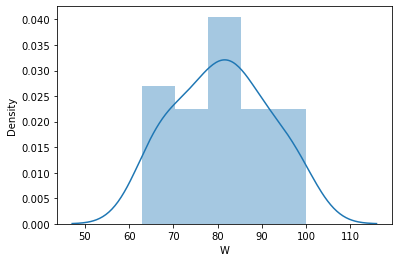

In [10]:
sns.distplot(Base_Ball.W)

In [11]:
Base_Ball.W.skew()

0.047088688953686085

From the above graph it is observed that the W data forms a continuous normat distribution with mean of 80.966

### Analysing the feature column

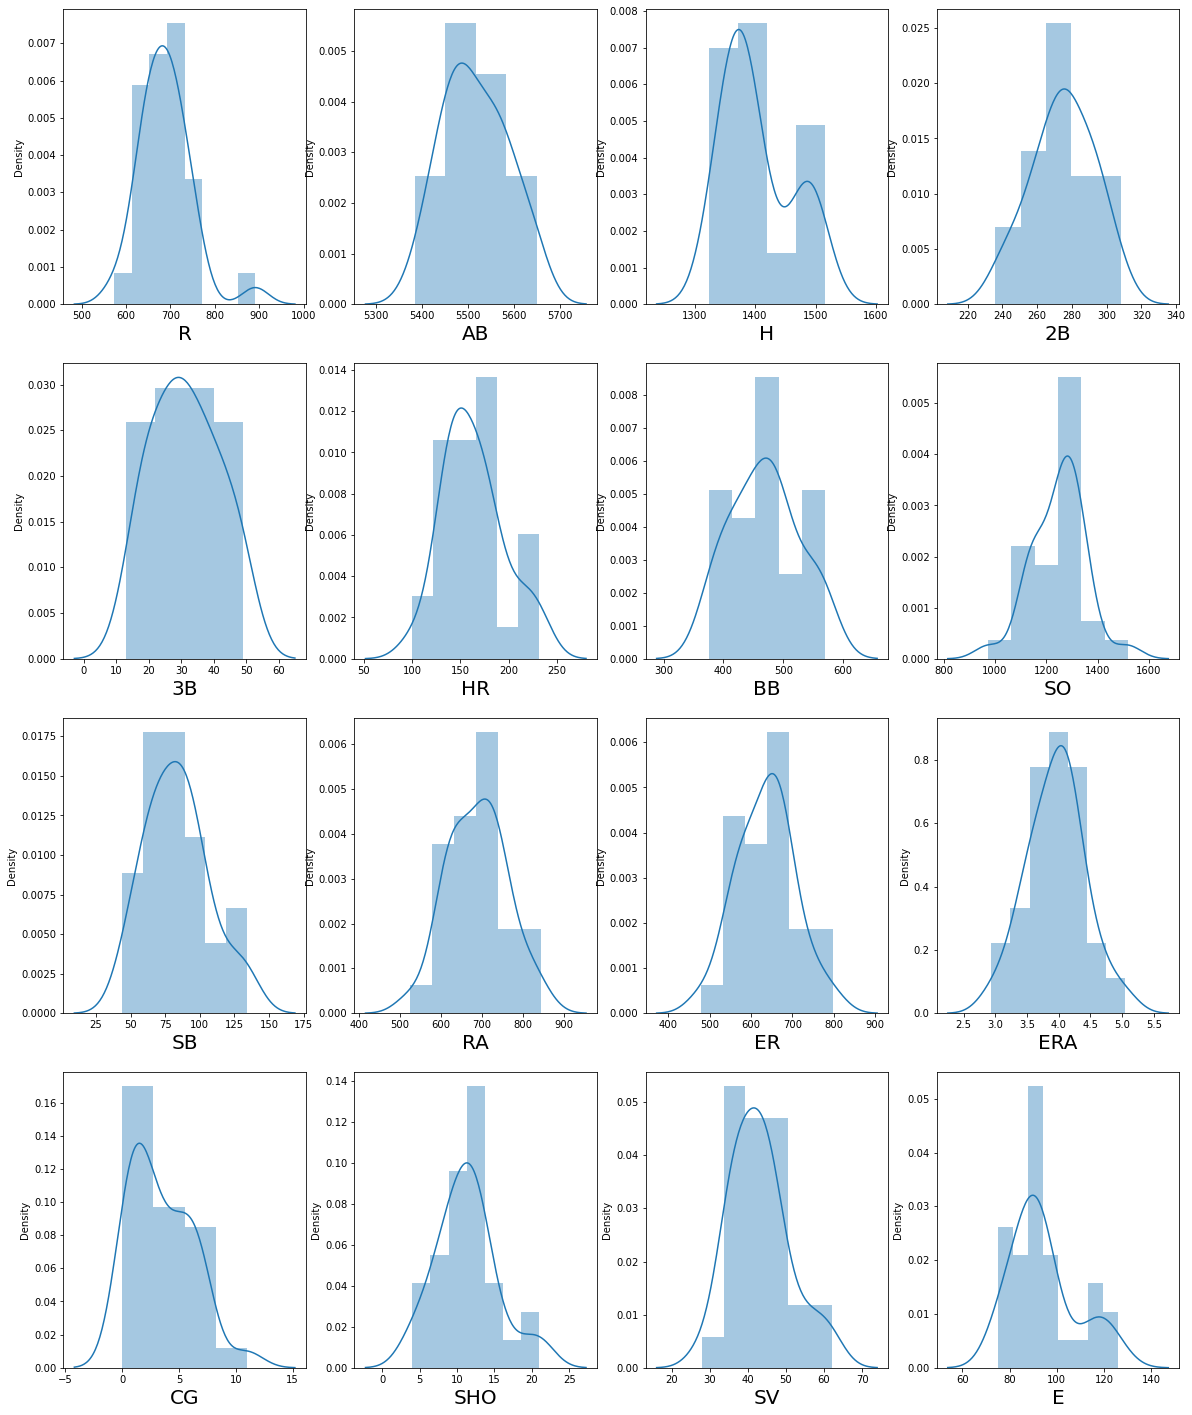

In [12]:
plt.figure(figsize = (20,25),facecolor = 'white')
plotnum = 1

for col in Base_Ball.drop(columns = ['W']):
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.distplot(Base_Ball[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()


It can be observed from above graphs that data is normally distributed

Data in columns like R,CG,E,SV,H are skwed.

In [13]:
Base_Ball.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Interpreting relationship between dependent and independent variable.

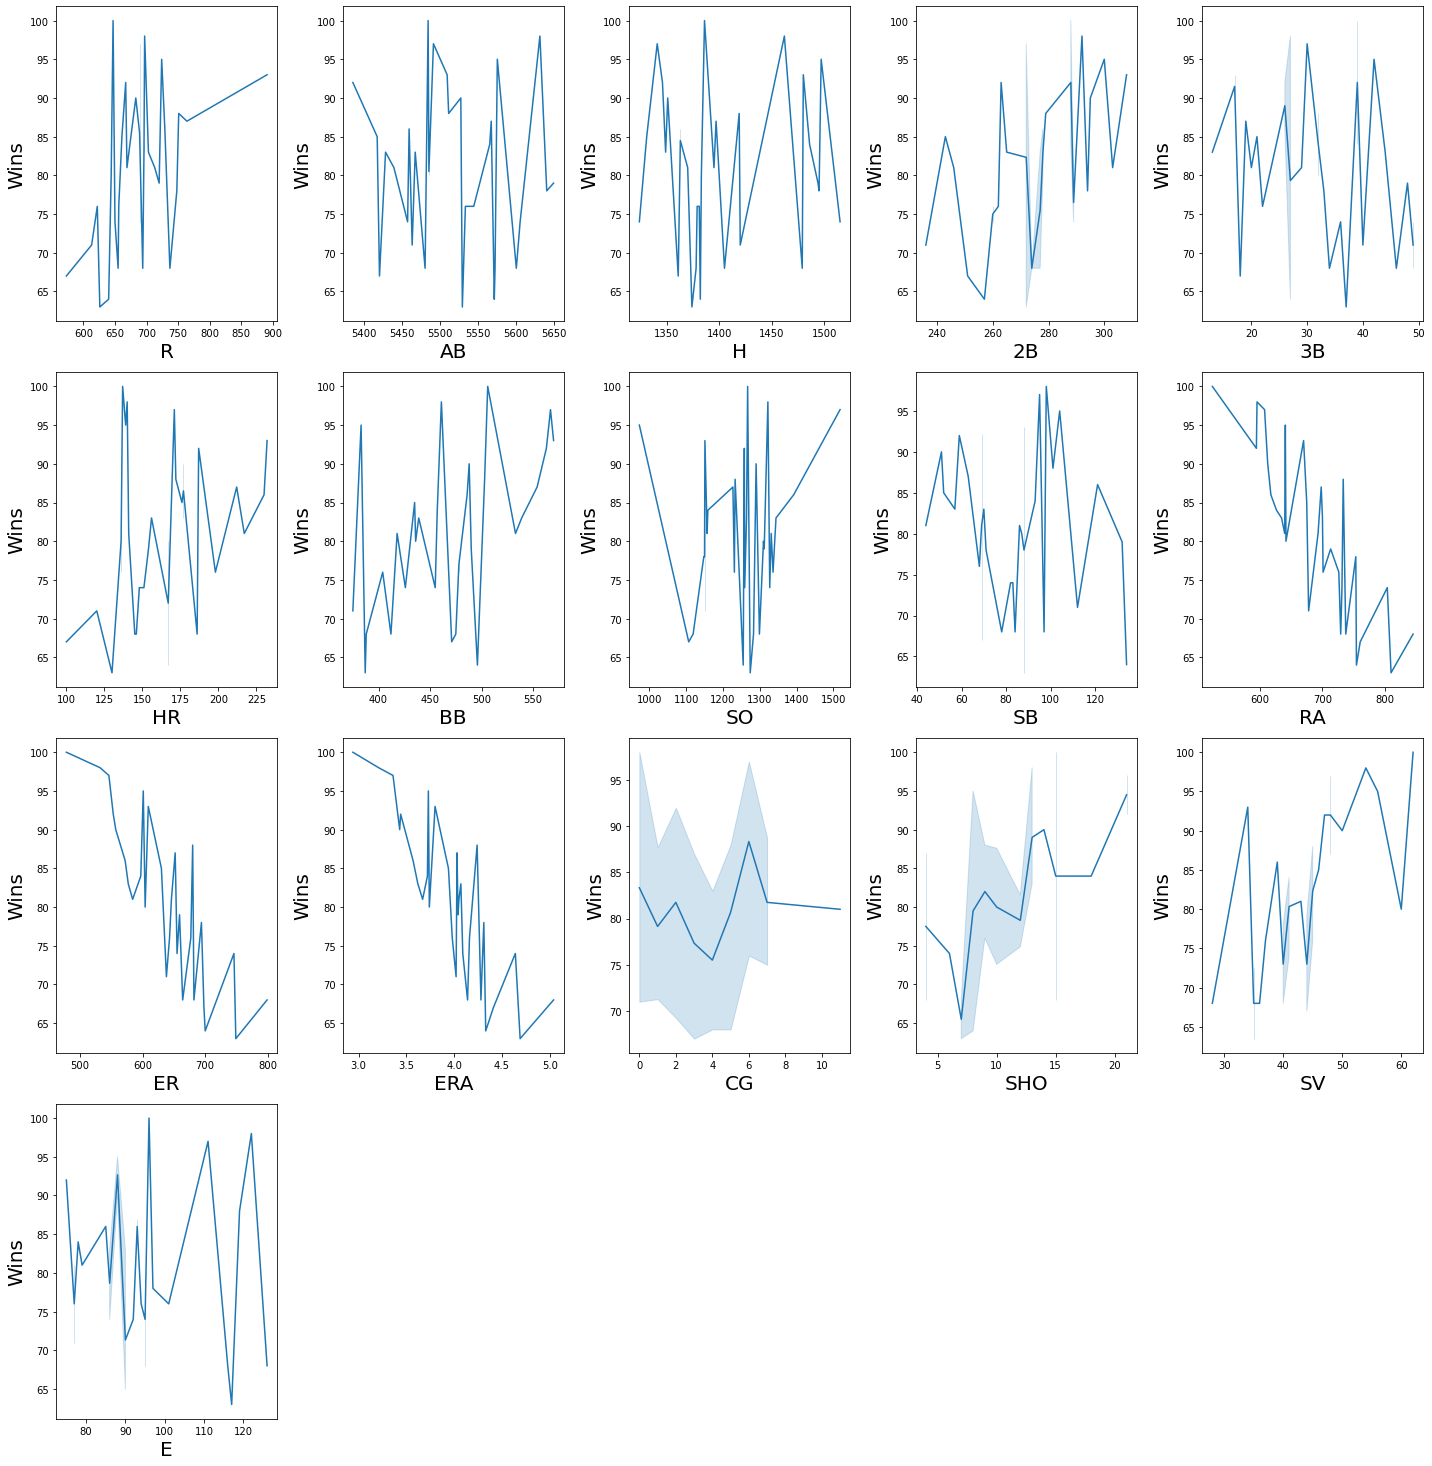

In [14]:
plt.figure(figsize = (20,25),facecolor = 'white')
plotnum = 1

x = Base_Ball.drop(columns=['W'])
y = Base_Ball['W']

for col in x:
    if plotnum<=16:
        plt.subplot(5,5,plotnum)
        sns.lineplot(x[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Wins',fontsize=20)
    plotnum+=1
plt.tight_layout()

From the above graphs it can be observed that features like R,2B,HR,BB,SV,SHO have a positive linear relationship with win, while RA,ER,ERA have a negative linear relationship with W.

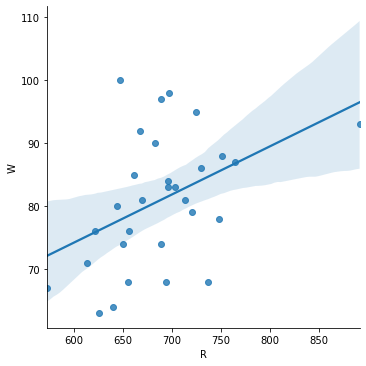

In [15]:
sns.lmplot(x="R",y="W", data = Base_Ball)

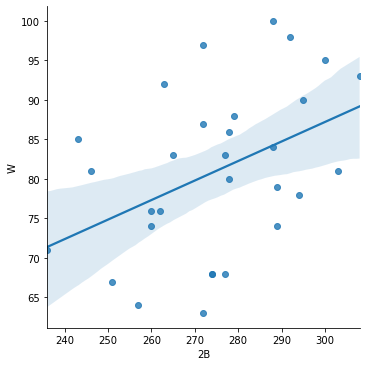

In [16]:
sns.lmplot(x="2B",y="W", data = Base_Ball)

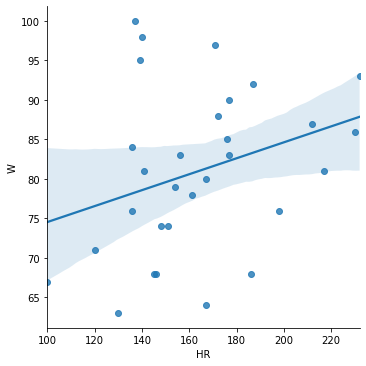

In [17]:
sns.lmplot(x="HR",y="W", data = Base_Ball)

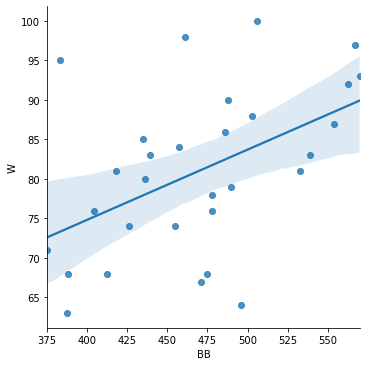

In [18]:
sns.lmplot(x="BB",y="W", data = Base_Ball)

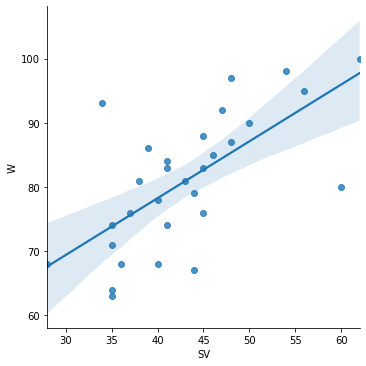

In [19]:
sns.lmplot(x="SV",y="W", data = Base_Ball)

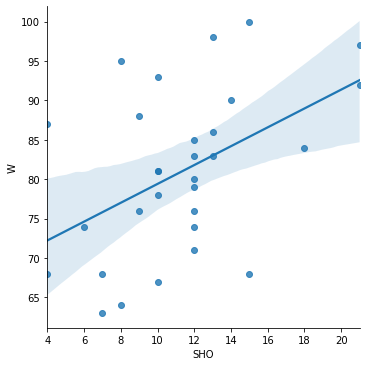

In [20]:
sns.lmplot(x="SHO",y="W", data = Base_Ball)

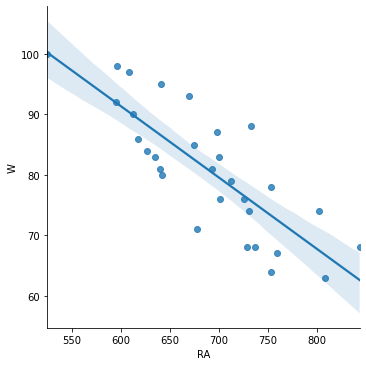

In [21]:
sns.lmplot(x="RA",y="W", data = Base_Ball)

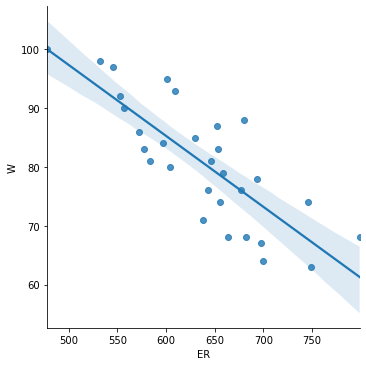

In [22]:
sns.lmplot(x="ER",y="W", data = Base_Ball)

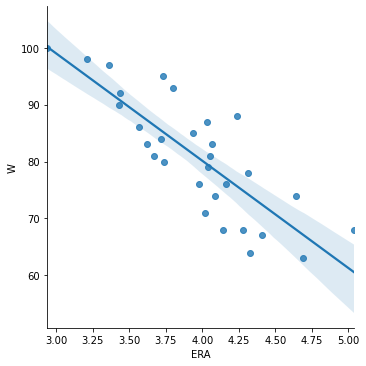

In [23]:
sns.lmplot(x="ERA",y="W", data = Base_Ball)

### Checking the outliers in Features

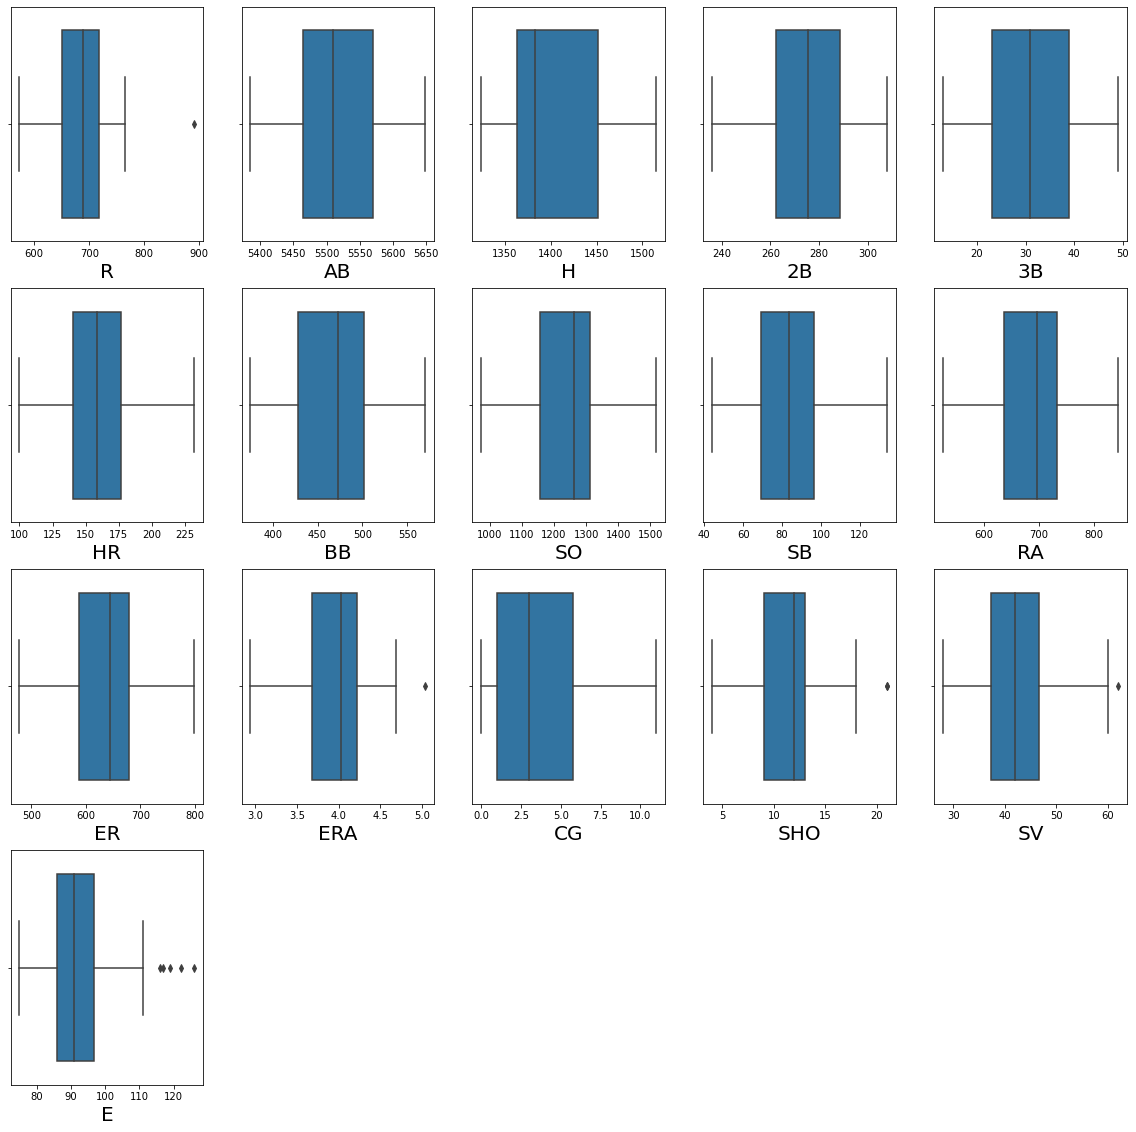

In [24]:
plt.figure(figsize=(20,25),facecolor = 'white')
plotnum=1

for col in Base_Ball.drop(columns = ['W'],axis=1):
    if plotnum<=16:
        plt.subplot(5,5,plotnum)
        sns.boxplot(Base_Ball[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

columns like R,ERA,SHO,SV and E have outliers.

## Removing outliers 

Removing outliers using Z Score method.

In [25]:
df2 = Base_Ball.drop(columns = ['W'],axis=1).copy() # making a copy of all features columns except W

In [26]:
df2

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [27]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs <3).all(axis=1)]

In [28]:
df3.shape

(29, 16)

In [29]:
df2.shape

(30, 16)

### Loss Percentage

In [30]:
Loss = (30-29)/30*100

In [31]:
Loss

3.3333333333333335

3.33% of data loss in acceptable range

### Using IQR method

In [32]:
df = Base_Ball.drop(columns = ['W'],axis=1).copy()

In [33]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)
    iqr= q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col >upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop,indx)

In [34]:
indxdrop

array([ 5., 29., 17., 25., 15., 10., 14., 16., 18., 24.])

In [35]:
df = df.drop(indxdrop)

In [36]:
df.shape

(20, 16)

### Loss percentage

In [37]:
loss = (30-20)/30*100

In [38]:
loss

33.33333333333333

33.33% of data loss is not within acceptable range

### Removing Outliers
Using Z Score Method

In [39]:
dropindx = Base_Ball.index.difference(df3.index)

In [40]:
Base_Ball.drop(dropindx,inplace = True) # dropping the outliers from original features dataframe

In [41]:
Base_Ball.reset_index(drop=True,inplace = True) # resetting the index of the dataframe

In [42]:
Base_Ball.shape

(29, 17)

In [43]:
Base_Ball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


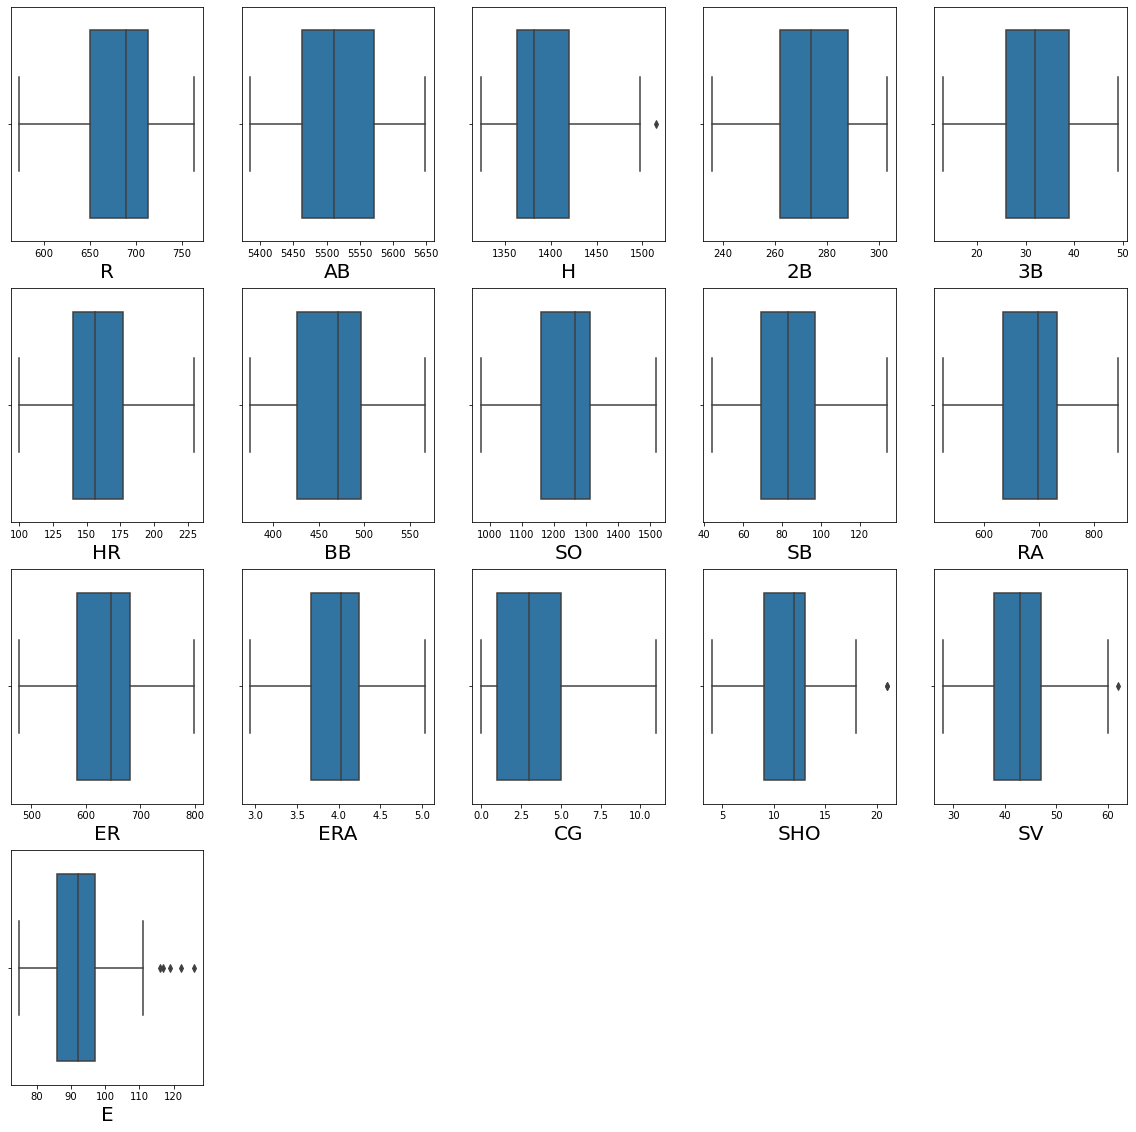

In [44]:
plt.figure(figsize = (20,25),facecolor = 'white')
plotnum = 1

for col in Base_Ball.drop(columns = ['W'],axis=1):
    if plotnum<=16:
        plt.subplot(5,5,plotnum)
        sns.boxplot(Base_Ball[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()
    

Some amount of outliers has been removed

### Checking Skewness 

In [45]:
Base_Ball.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

There is moderate skewness in E,CG,H and SV, rest of data distributions are symemetric

### Finding Correlation

In [46]:
BBall_corr = Base_Ball.corr()

In [47]:
BBall_corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
R,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
AB,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
H,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
2B,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
3B,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HR,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
BB,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
SO,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
SB,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


### Correlation using heap map

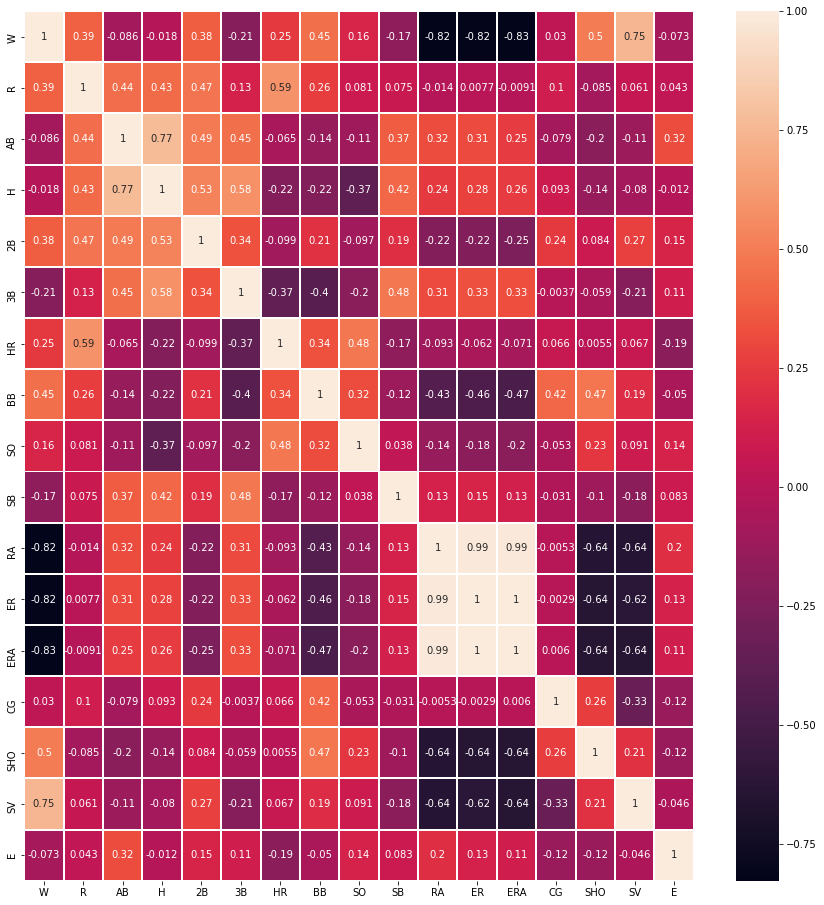

In [48]:
plt.figure(figsize=(15,16))
sns.heatmap(BBall_corr,annot=True,linewidth=1)
plt.show()

We can observe that there is a very high correlation between features ER,ERA,RA.

ERA is calculated as ER*9/Inning Pitched, factors like "Inning Pitched" are not available as columns in the data.

### Visualising correlation of feature columns with label column.

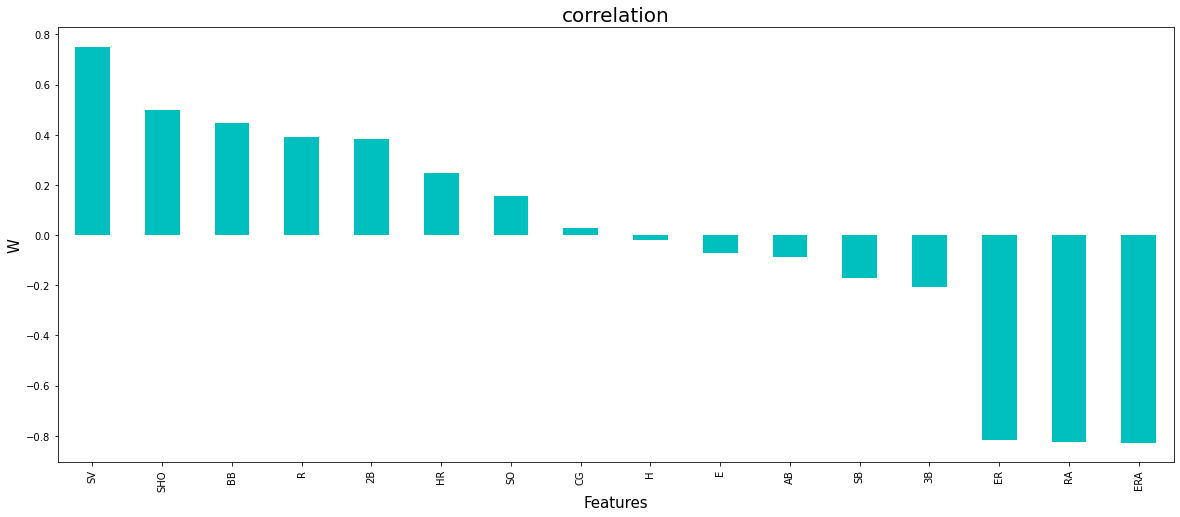

In [49]:
plt.figure(figsize=(20,8))
Base_Ball.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('W',fontsize=15)
plt.title('correlation',fontsize=20)
plt.show()

SV has the highest positive correlation with W followed by SHO and BB, while ER,RA and ERA have the highest negative correlation with W, H has the weakest correlation with W.

### Normalizing Data distribution using PowerTransformer

In [50]:
powtrns = PowerTransformer(method = 'yeo-johnson',standardize = True)

In [51]:
skewed = ['E','CG','SV']

In [52]:
df4 = Base_Ball[skewed].copy()

In [53]:
df4

,E,CG,SV
0,88,2,56
1,86,2,45
2,79,11,38
3,101,7,37
4,86,7,35
5,93,3,48
6,77,0,43
7,95,1,60
8,97,3,40
9,119,5,45


In [54]:
(Base_Ball==0).sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     3
SHO    0
SV     0
E      0
dtype: int64

In [55]:
transformed = powtrns.fit_transform(df4)

In [56]:
type(transformed)

numpy.ndarray

In [57]:
transformed = pd.DataFrame(transformed,columns=df4.columns) # to convert numpy array back into dataframe

In [58]:
transformed.skew()

E     0.065585
CG   -0.045947
SV   -0.000925
dtype: float64

In [59]:
(transformed==0).sum()

E     0
CG    0
SV    0
dtype: int64

In [60]:
transformed.index = Base_Ball.index

In [61]:
Base_Ball[skewed] = transformed[skewed]

In [62]:
Base_Ball.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.526943
SV    -0.000925
E      0.065585
dtype: float64

In [63]:
Base_Ball.shape

(29, 17)

A lot of skewness has been removed

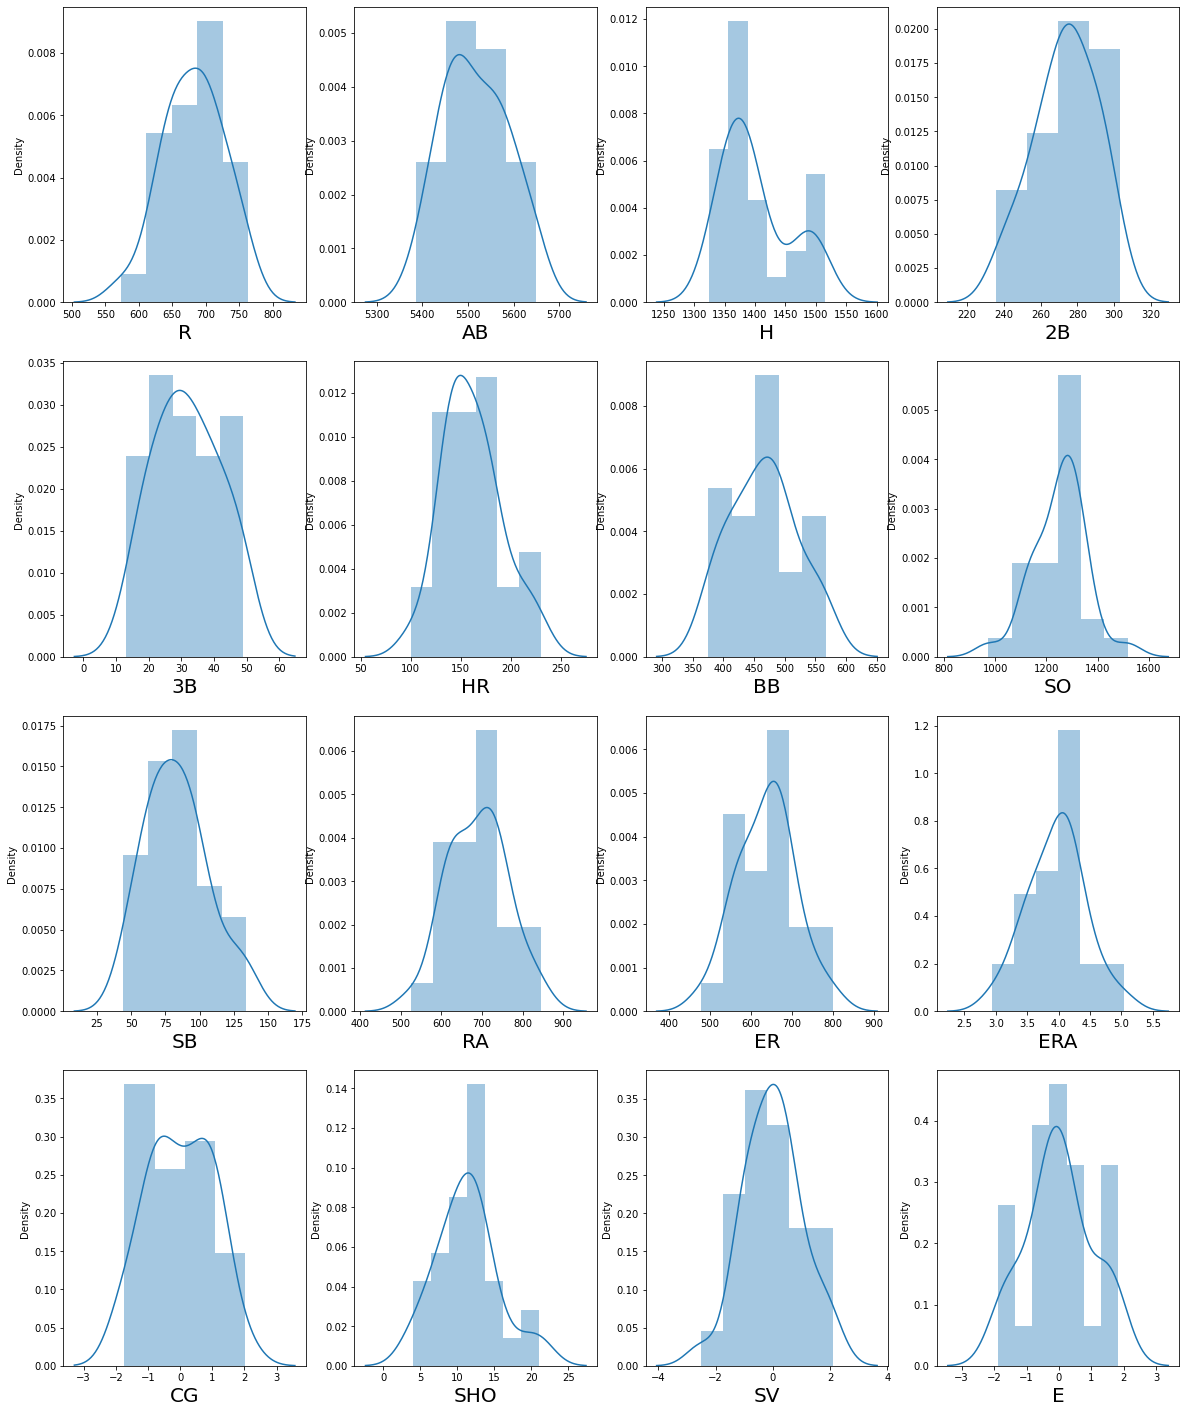

In [64]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1

for col in Base_Ball.drop(columns=['W']):
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.distplot(Base_Ball[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Data distribution looks much normalise now.

### Feature Selection

In [65]:
x = Base_Ball.drop(columns=['W'])
y = Base_Ball['W']

In [66]:
scaler = StandardScaler()

In [67]:
scaled_x = scaler.fit_transform(x)

### Checking for Multicolinearity using variance inflation factor

In [68]:
vif = pd.DataFrame()

In [69]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]

In [70]:
vif

,Features,vif
0,R,7.145507
1,AB,20.045249
2,H,10.070847
3,2B,3.617255
4,3B,3.351744
5,HR,8.763664
6,BB,3.478298
7,SO,2.896642
8,SB,1.985509
9,RA,202.458023


R,ER and ERA have the highest multicollinearity amongst all the feartures.

### Principle component analysis

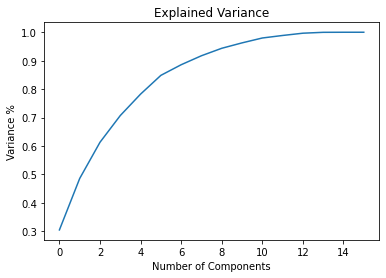

In [71]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

14 components explain 95% variance in data

In [72]:
pca = PCA(n_components = 14)
new_comp = pca.fit_transform(scaled_x)
principle_x = pd.DataFrame(new_comp,columns = np.arange(14))

In [73]:
principle_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.083823,-2.920609,2.404411,-0.519192,-2.321222,-0.363228,0.801997,0.567603,0.669809,0.553509,0.609912,-0.237115,-0.142374,0.156116
1,0.040239,0.441891,0.307842,-0.028394,-0.301015,0.383767,-0.928506,1.403832,0.094520,0.118770,-0.717897,-0.277762,-0.047386,0.531173
2,-1.193819,-0.797624,0.127786,2.706134,-0.639873,-0.688634,1.477931,1.007298,0.076831,-1.211474,-0.329547,0.128500,0.054950,-0.122480
3,0.726536,1.464451,0.666725,0.743334,0.526002,-1.123210,-0.122907,-0.254285,0.381915,-0.586572,1.390158,0.143165,0.797181,0.268029
4,3.433005,-1.466989,-0.694311,1.676540,0.015659,0.233655,-1.137787,0.194456,-1.156522,-0.276122,0.114767,0.158575,0.118948,-0.316581
5,-0.349433,-0.354773,-2.819142,-1.204914,-1.684508,-1.049062,1.001475,-0.499151,-0.024055,0.251810,-0.613946,-0.077660,0.797618,0.026140
6,-0.833840,2.203214,-1.321381,-1.685617,-2.094846,1.419340,-1.255718,-0.646639,0.052447,-0.429191,-0.056212,0.177004,-0.033744,0.024824
7,-1.335585,0.054447,1.078886,-1.477306,0.182585,0.214306,0.025752,0.822445,-0.721766,0.362064,0.550002,-0.415113,-0.188529,-0.271990
8,2.157745,-2.052948,-0.914972,-0.012153,-1.098287,-1.181274,-0.470617,-0.839563,-0.209176,-0.080908,-0.329612,0.101535,-0.311042,0.017298
9,1.015355,-0.945705,-1.545605,-0.332017,0.422738,-0.917129,0.871394,0.495582,0.447687,1.213895,-0.137579,0.448252,-0.367028,0.076357


### Selecting Kbest feature

In [74]:
bestfeat = SelectKBest(score_func = f_classif,k=16)
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [75]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns  =['Feature','Score']
print(featureScores.nlargest(22,'Score'))

   Feature     Score
15       E  4.329879
8       SB  3.283197
9       RA  2.524616
0        R  2.485509
14      SV  1.764635
11     ERA  1.732208
10      ER  1.636442
1       AB  1.622586
7       SO  1.519889
13     SHO  1.253358
6       BB  0.943327
5       HR  0.818974
4       3B  0.811129
3       2B  0.799063
2        H  0.729450
12      CG  0.436693


Selecting best features based on their scores and dropping a highly colinear column 'ERA'

In [76]:
x_best = x.drop(columns = ['ERA','CG']).copy() #dropping highly colinear feature and feature with low score

In [77]:
ss_x_best  =scaler.fit_transform(x_best)

The data to be predict in target/label column is continuous in nature since it is the number of wins. Therefore Regression model will be use.

### Regression model building

### Finding the best random state

In [78]:
from sklearn.linear_model import Lasso
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(ss_x_best,y,test_size= .23,random_state=i)
    modr = Lasso()
    modr.fit(x_train,y_train)
    pred = modr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs = i
print(f"Best Accuracy is : {maxAcc} on random_state {maxRs}")

Best Accuracy is : 0.9535335084587393 on random_state 82


In [79]:
x_train,x_test,y_train,y_test = train_test_split(ss_x_best,y,test_size= .23,random_state=82)

In [80]:
rf = RandomForestRegressor()
xg = XGBRegressor()
sv = SVR()
r = Ridge()
l = Lasso()
adb = AdaBoostRegressor()

### Training the Model

In [81]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
sv.fit(x_train,y_train)
r.fit(x_train,y_train)
l.fit(x_train,y_train)
adb.fit(x_train,y_train)

AdaBoostRegressor()

All models have been trained

### Ridge Regression Model

In [82]:
y_r_pred = r.predict(x_test)

In [83]:
#R2 Score
r2_score(y_test,y_r_pred)

0.740080340619877

In [84]:
#Mean Squared Error
mean_squared_error(y_test,y_r_pred)

17.92915201438399

In [85]:
#Root Mean Squared Error
np.sqrt(mean_squared_error(y_test,y_r_pred))

4.234282939812123

### Lasso Regression Model

In [86]:
y_l_pred = l.predict(x_test)

In [87]:
#R2 Score
r2_score(y_test,y_l_pred)

0.9535335084587393

In [88]:
#Mean Squared Error
mean_squared_error(y_test,y_l_pred)

3.2052396206012497

In [89]:
#Root Mean Squared Error
np.sqrt(mean_squared_error(y_test,y_l_pred))

1.7903183014763742

### RandomForest Regression Model

In [90]:
y_rf_pred = rf.predict(x_test)

In [91]:
# R2 Score
r2_score(y_test,y_rf_pred)

0.6495773076923075

In [92]:
#Mean Squared error
mean_squared_error(y_test,y_rf_pred)

24.1720142857143

In [93]:
#Root Mean Squared Error
np.sqrt(mean_squared_error(y_test,y_rf_pred))

4.916504274961459

### XGB Regression Model

In [94]:
y_xg_pred = xg.predict(x_test)

In [95]:
#R2_ Score
r2_score(y_test,y_xg_pred)

0.6933053935036724

In [96]:
#Mean Squared Error
mean_squared_error(y_test,y_xg_pred)

21.155668774644646

In [97]:
#Root Mean Squared Error
np.sqrt(mean_squared_error(y_test,y_xg_pred))

4.5995291905416416

### AdaBoost Regression Model

In [98]:
y_adb_pred = adb.predict(x_test)

In [99]:
# R2 Score
r2_score(y_test,y_adb_pred)

0.5789914412510567

In [100]:
#Mean Squared Error
mean_squared_error(y_test,y_adb_pred)

29.040998542274046

In [101]:
# Root Mean Squared Error
np.sqrt(mean_squared_error(y_test,y_adb_pred))

5.388970081775742

### Model Cross Validation

### Ridge Regression

In [102]:
cross_val_score(r,ss_x_best,y,cv=4).mean()

0.553934442865905

### Lasso Regression

In [103]:
cross_val_score(l,ss_x_best,y,cv=4).mean()

0.7529016115079561

### Random Forest Regression

In [104]:
cross_val_score(rf,ss_x_best,y,cv=4).mean()

0.5154032639119024

### XGB Regression

In [105]:
cross_val_score(xg,ss_x_best,y,cv=4).mean()

0.3924562694370372

### AdaBoost Regression

In [106]:
cross_val_score(adb,ss_x_best,y,cv=4).mean()

0.5258557411655379

Based on comparing accuracy score result with cross validation results, it is determind that Lasso Regression Model is the best model. It also has the lowest Root Mean Squared error score.

### Hyper Parameter Tuning

### Lasso Regression

In [107]:
parameter = {'alpha':np.array([5,0.5,0.05,0.005,0.0005,1,0.1,0.01,0.001,0.0001,0]),'fit_intercept':[True,False],'normalize':[True,False],'max_iter':[1000,2000,3000],'random_state':np.arange(100),'selection':["cyclic","random"]}

In [108]:
GridCV = GridSearchCV(Lasso(),parameter,cv=5,n_jobs= -1, verbose=1)

In [109]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 26400 candidates, totalling 132000 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([5.e+00, 5.e-01, 5.e-02, 5.e-03, 5.e-04, 1.e+00, 1.e-01, 1.e-02,
       1.e-03, 1.e-04, 0.e+00]),
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 2000, 3000],
                         'normalize': [True, False],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=1)

In [110]:
GridCV.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'random_state': 15,
 'selection': 'random'}

In [111]:
Best_mod = Lasso(alpha=1, fit_intercept = True,max_iter = 1000,normalize = False,random_state = 15,selection = 'random')

In [112]:
Best_mod.fit(x_train,y_train)

Lasso(alpha=1, random_state=15, selection='random')

In [113]:
lpred = Best_mod.predict(x_test)
acc = r2_score(y_test,lpred)
print(acc*100)

95.35279096387974


Lasso Regression has an accuracy of 95%

### Saving the model

In [114]:
import joblib
joblib.dump(Best_mod,"BaseBallModel.pkl")

['BaseBallModel.pkl']

### Loading the Model

In [115]:
mod = joblib.load("BaseBallModel.pkl")

In [116]:
print(mod.predict(x_test))

[64.39376399 79.91093734 77.47769336 90.34134458 72.42438173 86.29169899
 85.29648827]


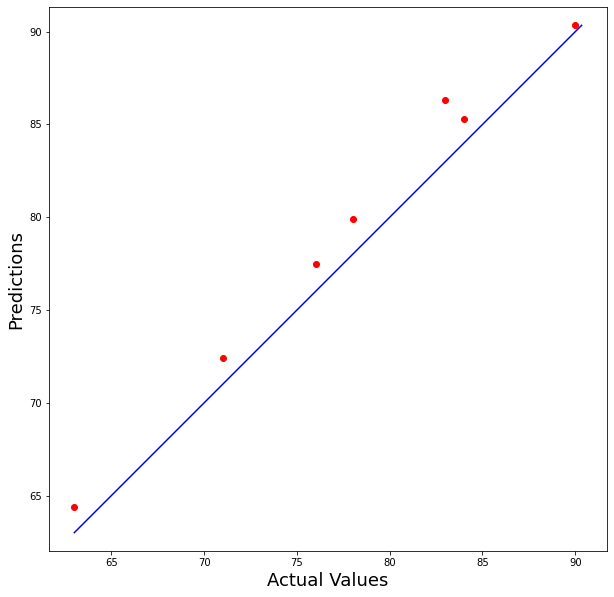

In [117]:
plt.figure(figsize = (10,10))
plt.scatter(y_test,lpred, c='red')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(lpred), max(y_test))
p2 = min(min(lpred), min(y_test))
plt.plot([p1,p2],[p1,p2], 'b-')
plt.xlabel('Actual Values', fontsize=18)
plt.ylabel('Predictions',fontsize=18)
plt.axis('equal')
plt.show()
